In [1]:
#Dependencies and Setup
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy.stats as st 
import matplotlib.ticker as ticker
import numpy as np
import pprint

#Import the Tables from SQlite3

connection = sqlite3.connect("project3.db")

stations_data = pd.read_sql_query("SELECT * FROM station_data", connection)

ev_sales_data = pd.read_sql_query("SELECT * FROM ev_sales_data", connection)

state_data = pd.read_sql_query("SELECT * FROM state_data", connection)

display(ev_sales_data)

,index,region,category,parameter,mode,powertrain,year,unit,value
0,0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
...,...,...,...,...,...,...,...,...,...
829,829,World,Historical,EV sales,Cars,PHEV,2020,Vehicles,970000
830,830,World,Historical,EV sales,Cars,PHEV,2021,Vehicles,1900000
831,831,World,Historical,EV sales,Cars,BEV,2021,Vehicles,4600000
832,832,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000


In [2]:
display(state_data)

,index,State,Total EVs (2),Level 1 Ports (1),Level 2 Ports (1),DCFC Ports (1),Total Ports (1),Ratio of EVs to Charger Ports
0,0,California,930811,280,27762,6143,34185,27.23
1,1,Florida,108749,35,4557,1052,5644,19.27
2,2,New York,106024,15,5774,758,6547,16.19
3,3,Washington,80397,80,2985,700,3765,21.35
4,4,Texas,78585,32,4124,790,4946,15.89
5,5,New Jersey,66555,14,1095,501,1610,41.34
6,6,Georgia,53416,200,2994,560,3754,14.23
7,7,Massachusetts,51834,13,3726,371,4110,12.61
8,8,Illinois,49746,13,1786,452,2251,22.10
9,9,Colorado,47633,61,2788,506,3355,14.20


In [3]:
display(stations_data)

,index,Year,EVSE Ports,Station Locations
0,0,2011,5070,2100
1,1,2012,14982,6200
2,2,2013,19472,8100
3,3,2014,25602,10712
4,4,2015,34151,13696
5,5,2016,45124,17723
6,6,2017,53117,19792
7,7,2018,64037,22826
8,8,2019,85079,26959
9,9,2020,106814,31738


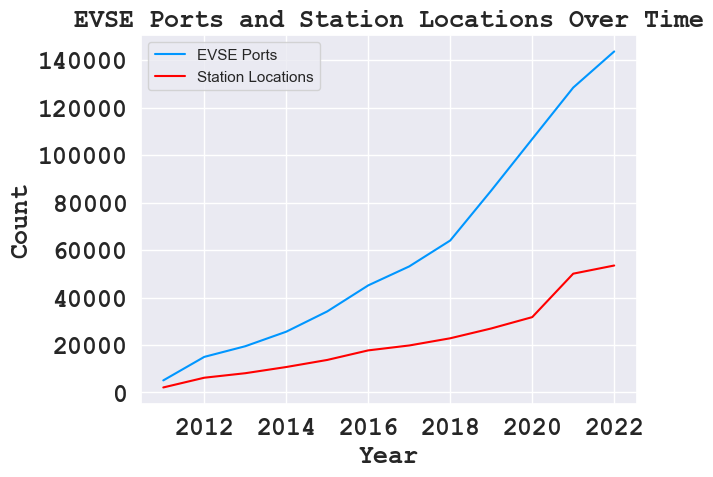

In [4]:
# Assuming 'stations_data' is your DataFrame with columns 'Year', 'EVSE Ports', and 'Station Locations'
years_x_axis = stations_data['Year']
evse_ports_y_axis = stations_data['EVSE Ports']
station_locations_y_axis = stations_data['Station Locations']

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot for EVSE Ports over Years with bright green color
sns.lineplot(x=years_x_axis, y=evse_ports_y_axis, data=stations_data, label="EVSE Ports", color='#0096FF')

# Create a line plot for Station Locations over Years
sns.lineplot(x=years_x_axis, y=station_locations_y_axis, data=stations_data, label="Station Locations", color='red')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel('Count', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title('EVSE Ports and Station Locations Over Time', fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=18)

# Show the plot
plt.legend()
plt.show()

In [5]:
###BEV = Battery Electric Vehicle
###PHEV = Plug-in Hybrid Electric Vehicle  

In [6]:
world_ev_data = ev_sales_data.loc[ev_sales_data["region"] == "World"]
world_ev_data.head()

,index,region,category,parameter,mode,powertrain,year,unit,value
808,808,World,Historical,EV sales,Cars,BEV,2010,Vehicles,7200
809,809,World,Historical,EV sales,Cars,PHEV,2010,Vehicles,370
810,810,World,Historical,EV sales,Cars,PHEV,2011,Vehicles,9000
811,811,World,Historical,EV sales,Cars,BEV,2011,Vehicles,39000
812,812,World,Historical,EV sales,Cars,BEV,2012,Vehicles,58000


In [7]:
nworld_ev_data = ev_sales_data.loc[ev_sales_data["region"] != "World"]
nworld_ev_data.head()

,index,region,category,parameter,mode,powertrain,year,unit,value
0,0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


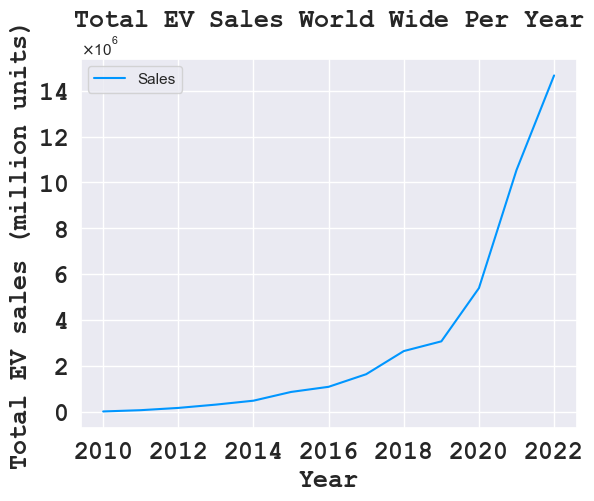

In [8]:
#I reccommend using this data set, the one with only world data seems to be off by 4 million units. This is a better agregate of the data.
total_ev_sales = nworld_ev_data.groupby("year")["value"].sum()
total_ev_sales

years_x_axis = total_ev_sales.index
sales_y_axis = total_ev_sales.values

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total EV sales (million units)", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total EV Sales World Wide Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=18)

# Show the plot
plt.legend()
plt.show()

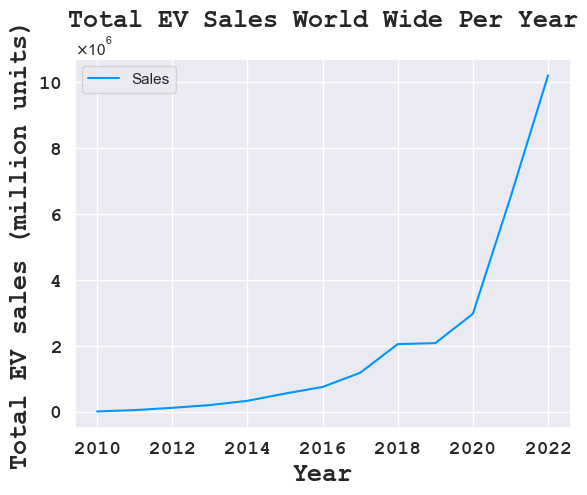

In [9]:
###############################################



#I do not reccommend putting weight into this graph



##########################################33#

total_ev_sales = world_ev_data.groupby("year")["value"].sum()
total_ev_sales

years_x_axis = total_ev_sales.index
sales_y_axis = total_ev_sales.values


# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot 
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total EV sales (million units)", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total EV Sales World Wide Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=14)

# Show the plot
plt.legend()
plt.show()

In [10]:
usa_data = ev_sales_data.loc[ev_sales_data["region"] == "USA"]
usa_data.head()

,index,region,category,parameter,mode,powertrain,year,unit,value
783,783,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200
784,784,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800
785,785,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000
786,786,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000
787,787,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000


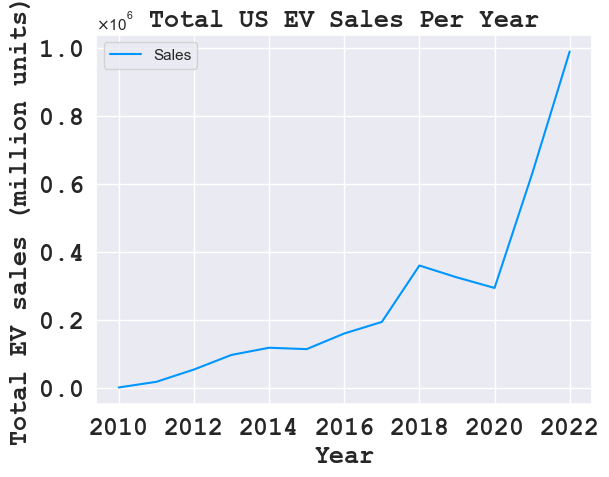

In [11]:
usa_graph = usa_data.groupby("year")["value"].sum()
usa_graph

years_x_axis = usa_graph.index
sales_y_axis = usa_graph.values

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot 
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total EV sales (million units)", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total US EV Sales Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=18)

# Show the plot
plt.legend()
plt.show()

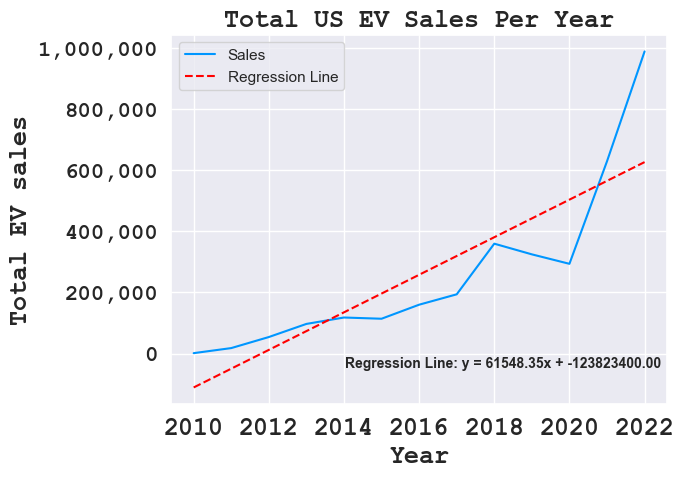

In [30]:

usa_graph = usa_data.groupby("year")["value"].sum()
usa_graph

years_x_axis = usa_graph.index
sales_y_axis = usa_graph.values

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

#Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot 
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total EV sales (million units)", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total US EV Sales Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Performing linear regression
coefficients = np.polyfit(years_x_axis, sales_y_axis, 1)
poly = np.poly1d(coefficients)
regression_line = poly(years_x_axis)

# Plotting the regression line
plt.plot(years_x_axis, regression_line, color='red', linestyle='--', label='Regression Line')

# Getting the equation of the regression line
m = coefficients[0]  # slope
b = coefficients[1]  # intercept
equation_text = f'Regression Line: y = {m:.2f}x + {b:.2f}'

# Plotting the equation text
plt.text(0.35, 0.1, equation_text, transform=plt.gca().transAxes, fontsize=10, fontweight = 'bold')

plt.xlabel("Year")
plt.ylabel("Total EV sales")
plt.title("Total US EV Sales Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.grid('on', which='major', axis='both')
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=16)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()

plt.show()

In [13]:
usa_bev_data = usa_data.loc[usa_data["powertrain"] == "BEV"]
usa_bev_data.head()

,index,region,category,parameter,mode,powertrain,year,unit,value
783,783,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200
784,784,USA,Historical,EV sales,Cars,BEV,2011,Vehicles,9800
787,787,USA,Historical,EV sales,Cars,BEV,2012,Vehicles,15000
788,788,USA,Historical,EV sales,Cars,BEV,2013,Vehicles,48000
791,791,USA,Historical,EV sales,Cars,BEV,2014,Vehicles,63000


In [14]:
usa_phev_data = usa_data.loc[usa_data["powertrain"] == "PHEV"]
usa_phev_data.head()

,index,region,category,parameter,mode,powertrain,year,unit,value
785,785,USA,Historical,EV sales,Cars,PHEV,2011,Vehicles,8000
786,786,USA,Historical,EV sales,Cars,PHEV,2012,Vehicles,39000
789,789,USA,Historical,EV sales,Cars,PHEV,2013,Vehicles,49000
790,790,USA,Historical,EV sales,Cars,PHEV,2014,Vehicles,55000
793,793,USA,Historical,EV sales,Cars,PHEV,2015,Vehicles,43000


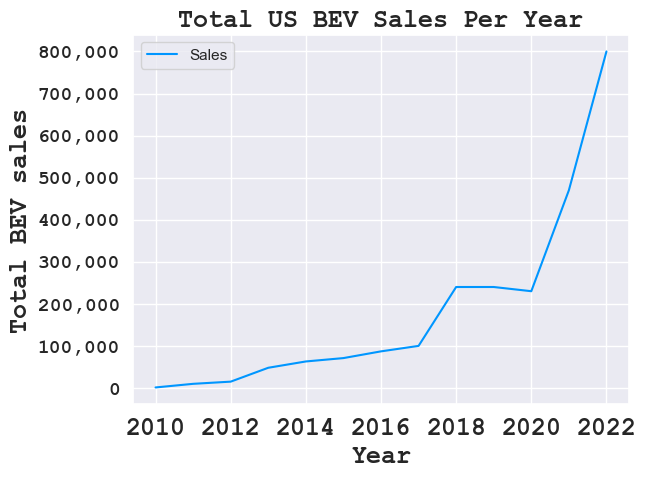

In [15]:
usa_bev_graph = usa_bev_data.groupby("year")["value"].sum()
usa_bev_graph

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = usa_bev_graph.index
sales_y_axis = usa_bev_graph.values

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot 
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total BEV sales", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total US BEV Sales Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# Show the plot
plt.legend()
plt.show()

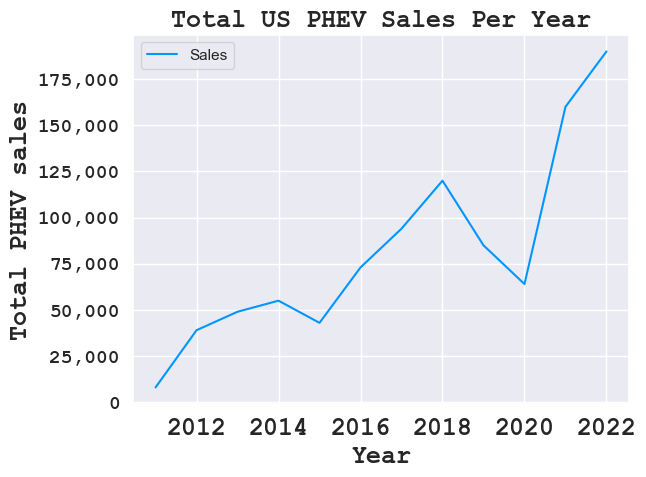

In [16]:
usa_phev_graph = usa_phev_data.groupby("year")["value"].sum()
usa_phev_graph

#Creating a line plot to visulize the total data set grouped by year

years_x_axis = usa_phev_graph.index
sales_y_axis = usa_phev_graph.values

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot 
sns.lineplot(x=years_x_axis, y=sales_y_axis, label="Sales", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel("Total PHEV sales", fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title("Total US PHEV Sales Per Year", fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useMathText= True)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
# Show the plot
plt.legend()
plt.show()

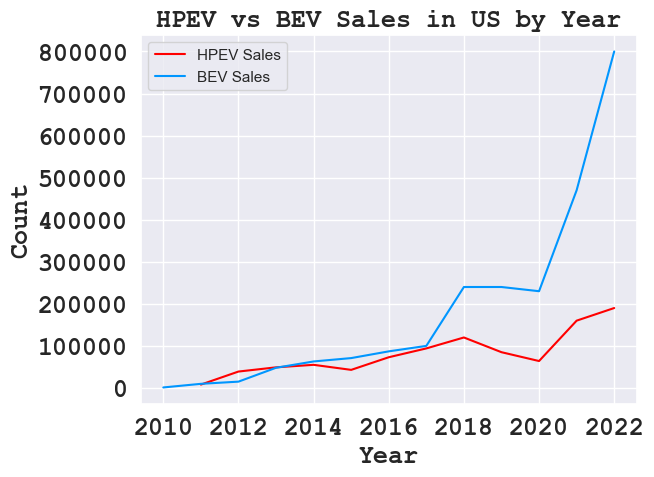

In [17]:
# Assuming 'stations_data' is your DataFrame with columns 'Year', 'EVSE Ports', and 'Station Locations'
years_x_axis = usa_data['year']
phev_sales = usa_data.loc[usa_data["powertrain"] == "PHEV"]['value']
bev_sales = usa_data.loc[usa_data["powertrain"] == "BEV"]['value']

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Customize the color palette to make it even darker
custom_palette = ["#333333", "#333333", "#333333", "#333333"]
sns.set_palette(custom_palette)

# Create a line plot for EVSE Ports over Years with bright green color
sns.lineplot(x=years_x_axis, y=phev_sales, label="HPEV Sales", color='red')

# Create a line plot for Station Locations over Years
sns.lineplot(x=years_x_axis, y=bev_sales, data=usa_data, label="BEV Sales ", color='#0096FF')

# Set the plot labels and title font family to Courier Bold and 4 points larger
plt.xlabel('Year', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.ylabel('Count', fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.title('HPEV vs BEV Sales in US by Year', fontfamily='Courier New', fontweight='bold', fontsize=18)

# Set legend font family to Courier Bold and 4 points larger
plt.legend(fontsize='large', title_fontsize='large', prop={'family': 'Courier New', 'weight': 'bold', 'size': 18})

# Set tick labels font family to Courier Bold and 4 points larger
plt.xticks(fontfamily='Courier New', fontweight='bold', fontsize=18)
plt.yticks(fontfamily='Courier New', fontweight='bold', fontsize=18)

# Show the plot
plt.legend()
plt.show()